<a href="https://colab.research.google.com/github/Jose-Bruno/PDS/blob/main/Atividade_individual_APNP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

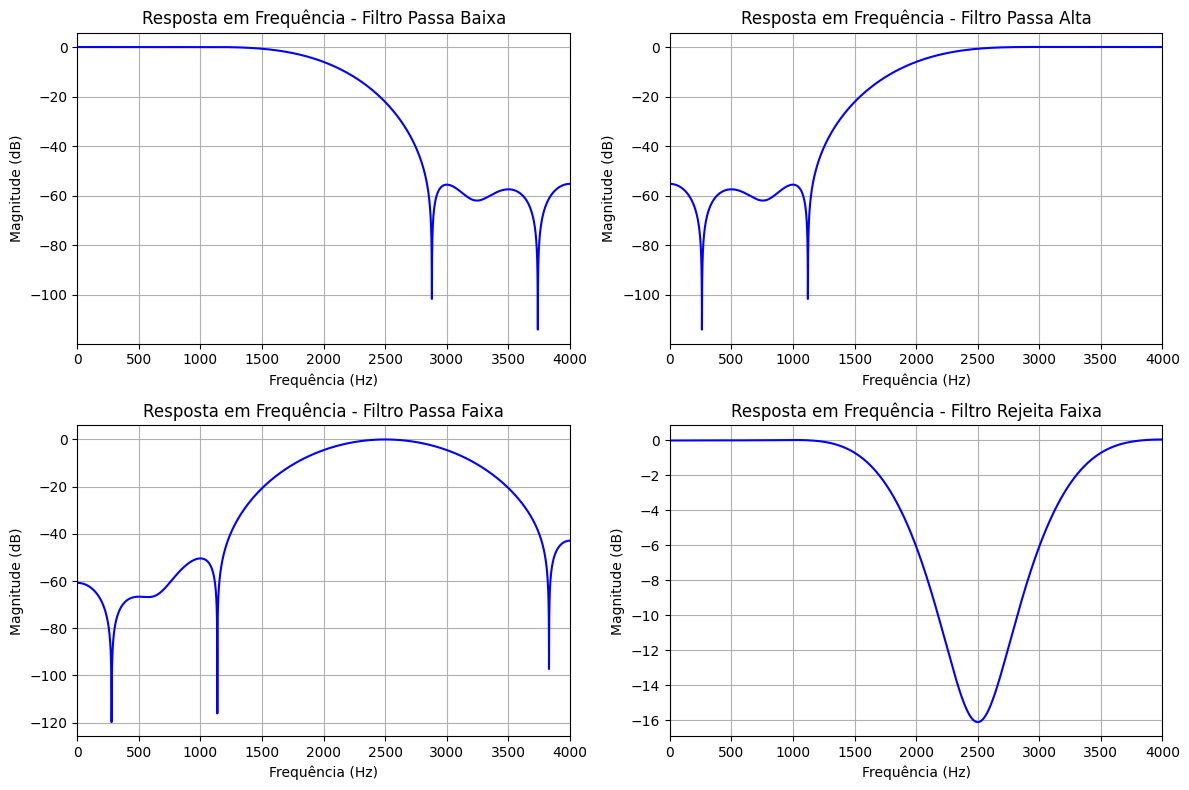

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Definindo parâmetros
Fs = 8000  # Frequência de amostragem em Hz
N = 17     # Número de coeficientes do filtro

# Frequências de corte normalizadas
Fc_low = 2000 / (Fs / 2)  # Filtro passa baixa
Fc_high = 2000 / (Fs / 2)  # Filtro passa alta
Fa_band = 2000 / (Fs / 2)  # Filtro passa faixa e rejeita faixa
Fb_band = 3000 / (Fs / 2)  # Filtro passa faixa e rejeita faixa

# Projetando os filtros
filtro_pb = firwin(N, Fc_low, pass_zero=True)  # Passa baixa
filtro_pa = firwin(N, Fc_high, pass_zero=False)  # Passa alta
filtro_pf = firwin(N, [Fa_band, Fb_band], pass_zero=False)  # Passa faixa
filtro_rf = firwin(N, [Fa_band, Fb_band], pass_zero=True)  # Rejeita faixa

# Calculando a resposta em frequência
w_pb, h_pb = freqz(filtro_pb, worN=8000)
w_pa, h_pa = freqz(filtro_pa, worN=8000)
w_pf, h_pf = freqz(filtro_pf, worN=8000)
w_rf, h_rf = freqz(filtro_rf, worN=8000)

# Criando subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotando a resposta em frequência
axs[0, 0].plot(w_pb * Fs / (2 * np.pi), 20 * np.log10(np.abs(h_pb)), 'b')
axs[0, 0].set_title('Resposta em Frequência - Filtro Passa Baixa')
axs[0, 0].set_xlabel('Frequência (Hz)')
axs[0, 0].set_ylabel('Magnitude (dB)')
axs[0, 0].set_xlim(0, 4000)
axs[0, 0].grid()

axs[0, 1].plot(w_pa * Fs / (2 * np.pi), 20 * np.log10(np.abs(h_pa)), 'b')
axs[0, 1].set_title('Resposta em Frequência - Filtro Passa Alta')
axs[0, 1].set_xlabel('Frequência (Hz)')
axs[0, 1].set_ylabel('Magnitude (dB)')
axs[0, 1].set_xlim(0, 4000)
axs[0, 1].grid()

axs[1, 0].plot(w_pf * Fs / (2 * np.pi), 20 * np.log10(np.abs(h_pf)), 'b')
axs[1, 0].set_title('Resposta em Frequência - Filtro Passa Faixa')
axs[1, 0].set_xlabel('Frequência (Hz)')
axs[1, 0].set_ylabel('Magnitude (dB)')
axs[1, 0].set_xlim(0, 4000)
axs[1, 0].grid()

axs[1, 1].plot(w_rf * Fs / (2 * np.pi), 20 * np.log10(np.abs(h_rf)), 'b')
axs[1, 1].set_title('Resposta em Frequência - Filtro Rejeita Faixa')
axs[1, 1].set_xlabel('Frequência (Hz)')
axs[1, 1].set_ylabel('Magnitude (dB)')
axs[1, 1].set_xlim(0, 4000)
axs[1, 1].grid()

# Ajustando layout
plt.tight_layout()
plt.show()